In [1]:
#MovieLens 데이터 살펴보기
%matplotlib inline
import time
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
# Data Source: https://grouplens.org/datasets/movielens

In [2]:
rating_file_path = "../data/ml-1m/ratings.dat"
movie_file_path = "../data/ml-1m/movies.dat"
user_file_path = "../data/ml-1m/users.dat"

rating_data = pd.read_csv(rating_file_path,             # 교재에서는 pd.io.parser.read_csv로 쓰나
                         names=['user_id','movie_id','rating','time'], #결과값에는 차이가 없음
                         delimiter="::",engine="python")
movie_data =  pd.read_csv(movie_file_path,
                         names=['movie_id','title','genre'],
                          delimiter="::",engine="python")
user_data =   pd.read_csv(user_file_path,
                         names=['user_id','gender','age',"occupation","zipcode"],
                          delimiter="::",engine="python")

rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [16]:
movie_data.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
user_data.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [3]:
#데이터에 대해서 알아봤으니 분석 시작!
#step2: 탐색적 데이터 분석하기
#영화의 총 갯수 출력
print("total number of move in data:",len(movie_data['movie_id'].unique())) #unique쓰면 numpy.array형식 나옴

#연도별 영화 개수가 많은 top10의 연도 출력
movie_data['year'] = movie_data['title'].apply(lambda x:x[-5:-1]) #문자열 인덱싱, 맨마지막이 -1
#인덱싱 하나 뒤까지 번호 써줘야 그전까지 인덱싱

total number of move in data: 3883


In [4]:
movie_data['year']

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
3878    2000
3879    2000
3880    2000
3881    2000
3882    2000
Name: year, Length: 3883, dtype: object

In [5]:
print("total number of move in data:",len(movie_data['movie_id'].unique())) 
movie_data['year'].value_counts().head(10)

total number of move in data: 3883


1996    345
1995    342
1998    337
1997    315
1999    283
1994    257
1993    165
2000    156
1986    104
1992    102
Name: year, dtype: int64

In [6]:
#가장 많이 나오는 genre알아보기
#그래서 dictionary에 해당 genre와 count 넣어주기!

#중요 어떻게 각 행에서 장르 추출해서 빈도 구하는지!

unique_genre_dict = {}
for index,row in movie_data.iterrows():
    #genre 피처가 \로 구분되어 있음), 
    genre_combination = row['genre'] 
    parsed_genre = genre_combination.split("|") # ["animation","comdey"] 리스트 형식으로 나옴
    #구분자로 부리한 장르의 속성을 unique_dict에 넣어줘서 계산하기
    for genre in parsed_genre :
        if genre in unique_genre_dict:
            unique_genre_dict[genre] += 1
        else :
            unique_genre_dict[genre] = 1

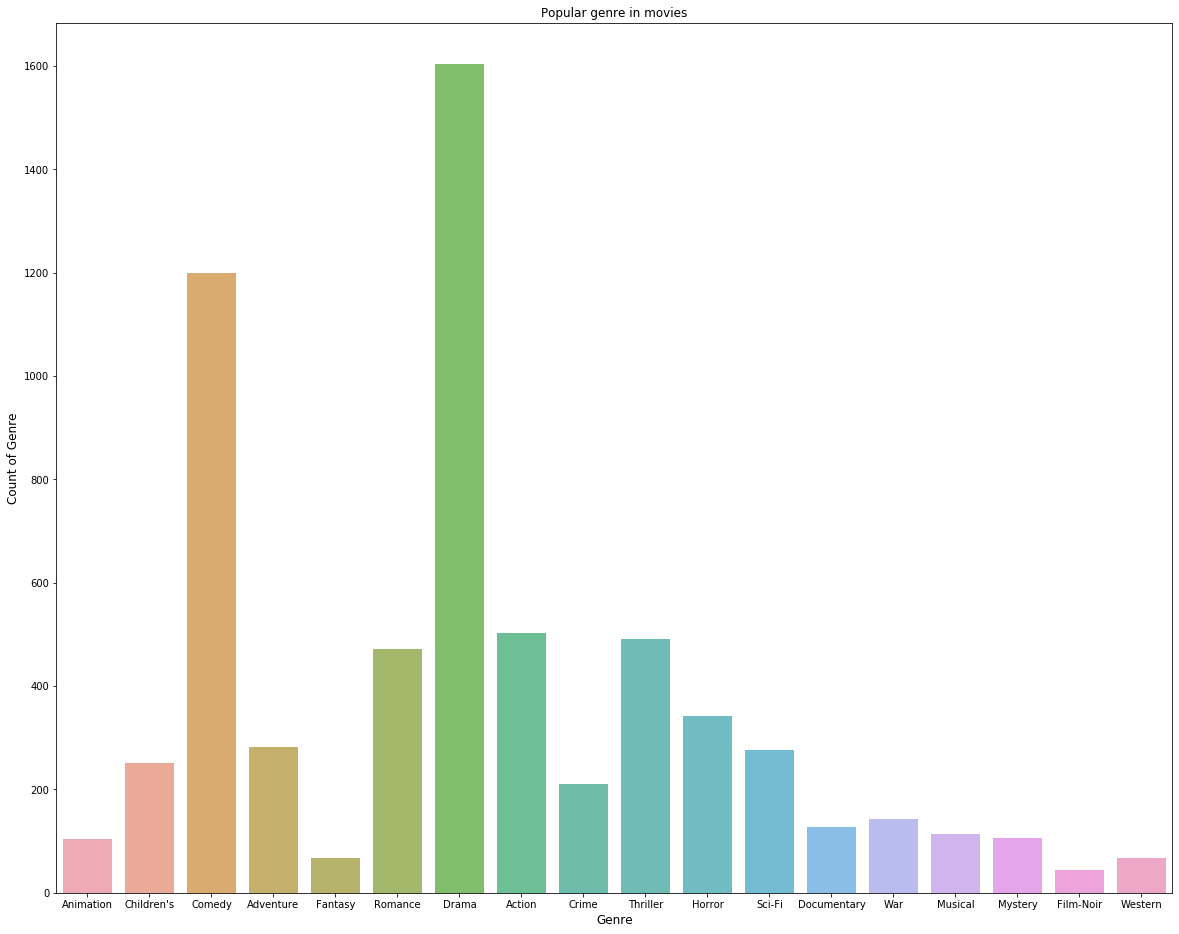

In [45]:
#unique_genre_dict 속성 이용해서 그래프 그리기
plt.rcParams['figure.figsize'] = [20,16] #화면사이즈 조정해주기
sns.barplot(list(unique_genre_dict.keys()),list(unique_genre_dict.values()), alpha=0.8)
plt.title("Popular genre in movies")
plt.ylabel("Count of Genre",fontsize=12)
plt.xlabel("Genre", fontsize=12)
plt.show()

In [7]:
#유저의 정보 알아보기
print("total number of user in data:", len(user_data['user_id'].unique()))

total number of user in data: 6040


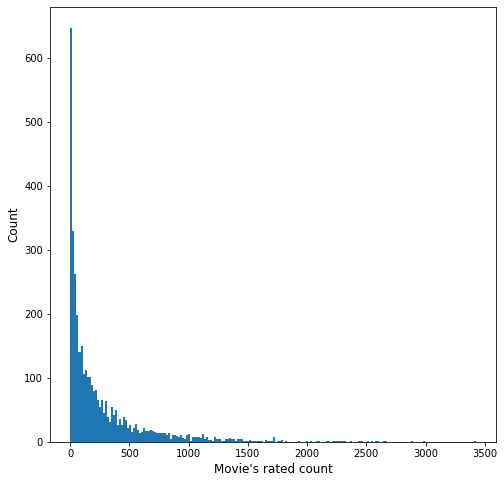

total number of movie in data: 3883
total number of movie rated below 100: 1687


In [8]:
movie_rate_count = rating_data.groupby('movie_id')['rating'].count().values #value하면 값이 array로 묶임
plt.rcParams['figure.figsize'] =[8,8]
fig = plt.hist(movie_rate_count,bins=200)
plt.ylabel("Count",fontsize=12)
plt.xlabel("Movie's rated count",fontsize=12)
plt.show()

print("total number of movie in data:", len(movie_data['movie_id'].unique()))
print("total number of movie rated below 100:", len(movie_rate_count[movie_rate_count < 100]))

In [9]:
#영화의 평균평점 탐색해보기
movie_grouped_rating_info = rating_data.groupby('movie_id')['rating'].agg(['mean','count'])
movie_grouped_rating_info.columns = ["rated_mean","rating_count"]
                #agg - > dictionary 형태 에러 나면 일단 기존 함수 써주고 rename 따로 하기
                #agg함수 사용법-> 여러 함수 적용하고 싶을때 함수를 ""string화 해서 list에 묶어주기

In [10]:
movie_grouped_rating_info.head(5)

,rated_mean,rating_count
movie_id,,
1,4.146846,2077
2,3.201141,701
3,3.016736,478
4,2.729412,170
5,3.006757,296


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021995419748>,
      dtype=object)

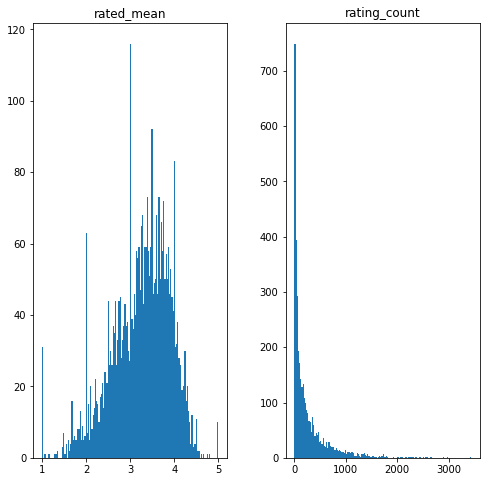

In [11]:
movie_grouped_rating_info.hist(bins=150, grid=False)

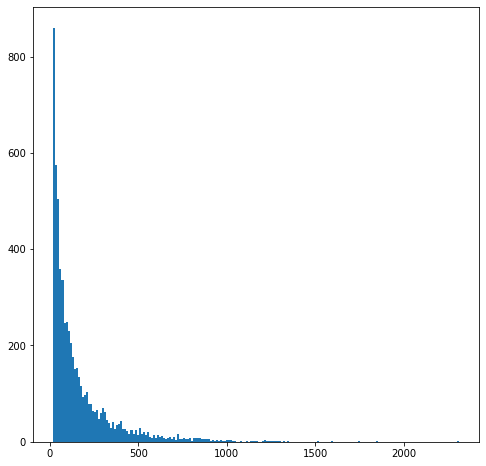

In [44]:
#미니퀴즈 3-5
#1 유저별로 평가한 영화갯수

rating_user_id = rating_data.groupby("user_id")['movie_id'].count()
rating_user_id.hist(bins=200, grid=False)


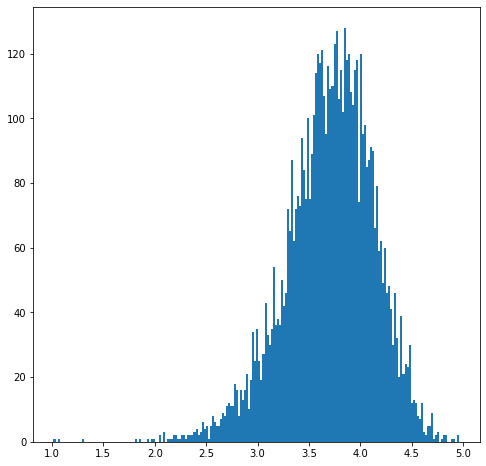

In [43]:
#유저별로 평가한 평균 영화의 점수
rating_grade_group = rating_data.groupby("user_id")['rating'].mean()
rating_grade_group.hist(bins=200,grid=False)

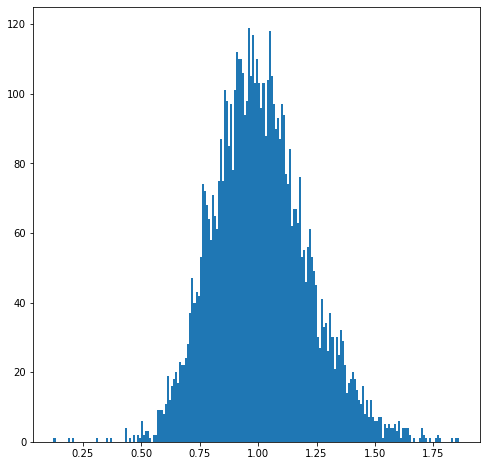

In [51]:
#유저별로 평가한 영화 점수의 편차
rating_data_variance = rating_data.groupby("user_id")["rating"].std()
rating_data_variance.hist(bins=200,grid=False)

rating_movie_variance

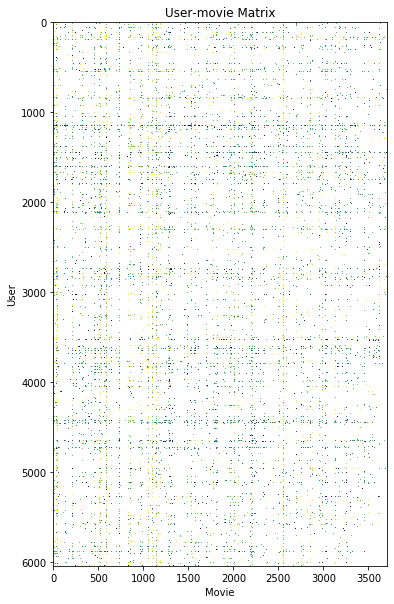

In [20]:
rating_data.head() #이런 데이터는 U-I-R(user item rating) 데이터로 행렬로 나타내기 용이함
rating_table = rating_data[["user_id","movie_id","rating"]].set_index(["user_id","movie_id"]).unstack()
                                                            #set_index(a,b)순서대로 데이터 세움
plt.rcParams["figure.figsize"] = [10,10]
plt.imshow(rating_table) #행렬로 보여주는데 거의 희미해서 행렬 완성기법사용
plt.grid(False)
plt.xlabel("Movie")
plt.ylabel("User")
plt.title("User-movie Matrix")
plt.show()

In [21]:
#행렬 완성 기법 (비어있는 rating채워넣기)

In [23]:
#평점 예측하기
#SVD사용하기
from surprise import SVD,Dataset,Reader,accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(rating_data[["user_id","movie_id","rating"]],reader)
train_data = data.build_full_trainset()

train_start = time.time()
model = SVD(n_factors = 8,
           lr_all = 0.005,
           reg_all = 0.02,
           n_epochs = 100)
model.fit(train_data)
train_end = time.time()
print("training time of model: %.2f seconds" % (train_end - train_start))

training time of model: 184.63 seconds


In [24]:
#user_id가 4인 유저의 영화 평가하기
target_user_id = 4
target_user_data =rating_data[rating_data["user_id"] == target_user_id]
target_user_data.head(5)

,user_id,movie_id,rating,time
233,4,3468,5,978294008
234,4,1210,3,978293924
235,4,2951,4,978294282
236,4,1214,4,978294260
237,4,1036,4,978294282


In [26]:
#user_id가 4인 유저가 평가한 영화의 히스토리 정보 추출하기
target_user_movie_rating_dict = {}

for index, row in target_user_data.iterrows():  ##이렇게 만드는 방법 알기!!
    movie_id = row["movie_id"] #target_user_id.movie_id의 첫번째 row 부터 추출
    target_user_movie_rating_dict[movie_id] = row['rating']
print(target_user_movie_rating_dict)

{3468: 5, 1210: 3, 2951: 4, 1214: 4, 1036: 4, 260: 5, 2028: 5, 480: 4, 1196: 2, 1198: 5, 1954: 5, 1097: 4, 3418: 4, 3702: 4, 2366: 4, 1387: 5, 3527: 1, 1201: 5, 2692: 5, 2947: 5, 1240: 5}


In [29]:
#타겟 유저가 보지 않은 영하 중 예상 평점이 높은 10개 선정하기
 #타겟 유저가 보지 않은 영화로 test dataset 만들기
test_data = []
for index, row in movie_data.iterrows():
    movie_id = row["movie_id"]
    rating = 0
    if movie_id in target_user_movie_rating_dict:
        continue
    test_data.append((target_user_id, movie_id, rating))
    
 #타겟 유저의 펴점 점수를 예측하기
target_user_predictions = model.test(test_data)



In [40]:
target_user_predictions[1:3]

[Prediction(uid=4, iid=2, r_ui=0, est=3.1834364321424116, details={'was_impossible': False}),
 Prediction(uid=4, iid=3, r_ui=0, est=2.8039174184297435, details={'was_impossible': False})]

In [42]:
#예측된 점수 중, 타겟 유저의 영화별 점수를 target_user_movie_predict로 지정
def get_user_predicted_ratings(predictions, user_id,user_history):
    target_user_movie_predict_dict = {}
    for uid, mid, rating, predicted_rating, _ in predictions:
        if user_id == uid:
            if mid not in user_history:  #없는 영화에 한해서
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict

target_user_movie_predict_dict = get_user_predicted_ratings(predictions=target_user_predictions,
                                                           user_id = target_user_id,
                                                           user_history = target_user_movie_rating_dict)


In [63]:
#예측된 영화중 top10의 영화 선정하기
target_user_top10_predicted = sorted(target_user_movie_predict_dict.items(),
                                     key=operator.itemgetter(1),reverse=True)[:10] #itemgetter1:두번째 값이 모이게


In [67]:
#타이틀 정보 출력하기 위해 movie_id마다 movie_title을 딕셔너리 형태로 저장하기
movie_dict = {}
for index,row in movie_data.iterrows():
    movie_id = row["movie_id"]
    movie_title = row["title"]
    movie_dict[movie_id] = movie_title
#아까 top10이랑 매핑해서 출력하ㅣㄱ
for predicted in target_user_top10_predicted:
    movie_id = predicted[0]
    predicted_rating = predicted[1]
    print(movie_dict[movie_id],":",predicted_rating)

To Live (Huozhe) (1994) : 5
Schindler's List (1993) : 5
Godfather, The (1972) : 5
Casablanca (1942) : 5
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) : 5
Citizen Kane (1941) : 5
Streetcar Named Desire, A (1951) : 5
Lawrence of Arabia (1962) : 5
To Kill a Mockingbird (1962) : 5
On the Waterfront (1954) : 5


In [69]:
#step4: 평가=> 예측모델평가하기
#과연 이 모델이 예측을 얼마나 잘했을까? => 보편적 방법: RMSE 계산하기

reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(rating_data[["user_id","movie_id","rating"]],reader)
train_data, test_data = train_test_split(data,test_size=0.2)

#SVD 모델 학습하기
train_start = time.time()
model = SVD(n_factors = 8,
           lr_all = 0.005,
           reg_all = 0.02,
           n_epochs = 100)
model.fit(train_data)
train_end = time.time()
print("training time of model: %.2f seconds" % (train_end - train_start))

predictions = model.test(test_data)

#테스터 데이터의 RMSE 출력
print("RMSE of test dataset in SVD model:")
accuracy.rmse(predictions)

training time of model: 153.48 seconds
RMSE of test dataset in SVD model:
RMSE: 0.8586


0.858648613091329

In [ ]:
#미니퀴즈 3-6
rmse = []
for i in range(1,20):
    model = SVD(n_factors = i,
           lr_all = 0.005,
           reg_all = 0.02,
           n_epochs = 100)
    model.fit(train_data)
    rmse_value = accuracy.rmse(predictions)
    rmse[i-1] = rmse_value
    
plt.plot(rmse)

In [71]:
#실제 평점과의 비교 시각화 하기
#타겟 유저 정보를 테스트 데이터로 생성하기
test_data = []
for index,row in movie_data.iterrows():
    movie_id = row["movie_id"]
    if movie_id in target_user_movie_rating_dict:
        rating = target_user_movie_rating_dict[movie_id]
        test_data.append((target_user_id,movie_id,rating))

#타겟 유저의 평점 저수 예측
target_user_predictions = model.test(test_data)



In [82]:
#예측된 점수 중, 타겟 유저의 영화별 점수를 predict_dict에 저장하기
def get_user_predicted_ratings(predictions,user_id, user_history):
    target_user_movie_predict_dict = {}
    for uid,mid,rating,predicted_rating,_ in predictions:
        if user_id == uid:
            if mid in user_history:
                target_user_movie_predict_dict[mid] = predicted_rating
    return target_user_movie_predict_dict
            
target_user_movie_predict_dict = get_user_predicted_ratings(predictions = target_user_predictions,
                                                   user_id = target_user_id,
                                                   user_history = target_user_movie_rating_dict)
target_user_movie_predict_dict

{260: 4.095576752010038,
 480: 3.479303501606446,
 1036: 3.8593318933881133,
 1097: 4.437255883356482,
 1196: 3.8235792932692516,
 1198: 4.359412030860897,
 1201: 4.282441570967817,
 1210: 3.3914710502131333,
 1214: 4.161332040422022,
 1240: 3.9446923830925615,
 1387: 4.532944318480701,
 1954: 4.339921768160131,
 2028: 4.4812413980338395,
 2366: 4.2234069529298095,
 2692: 4.346851853840689,
 2947: 4.2261490314803485,
 2951: 4.20560579113494,
 3418: 4.472140491974524,
 3468: 4.890349669709207,
 3527: 3.2730122232840486,
 3702: 3.7146141289814185}

In [84]:
#예측점수와 실제 점수 매핑하기
origin_rating_list = []
predicted_rating_list = []
movie_title_list = []
idx = 0

for movie_id, predicted_rating in target_user_movie_predict_dict.items():
    idx = idx + 1
    predicted_rating = round(predicted_rating,2)
    origin_rating = target_user_movie_rating_dict[movie_id]
    movie_title = movie_dict[movie_id]
    print("movie",str(idx),":",movie_title,"-",origin_rating,"/",predicted_rating)
    origin_rating_list.append(origin_rating)
    predicted_rating_list.append(predicted_rating)
    movie_title_list.append(str(idx))

movie 1 : Star Wars: Episode IV - A New Hope (1977) - 5 / 4.1
movie 2 : Jurassic Park (1993) - 4 / 3.48
movie 3 : Die Hard (1988) - 4 / 3.86
movie 4 : E.T. the Extra-Terrestrial (1982) - 4 / 4.44
movie 5 : Star Wars: Episode V - The Empire Strikes Back (1980) - 2 / 3.82
movie 6 : Raiders of the Lost Ark (1981) - 5 / 4.36
movie 7 : Good, The Bad and The Ugly, The (1966) - 5 / 4.28
movie 8 : Star Wars: Episode VI - Return of the Jedi (1983) - 3 / 3.39
movie 9 : Alien (1979) - 4 / 4.16
movie 10 : Terminator, The (1984) - 5 / 3.94
movie 11 : Jaws (1975) - 5 / 4.53
movie 12 : Rocky (1976) - 5 / 4.34
movie 13 : Saving Private Ryan (1998) - 5 / 4.48
movie 14 : King Kong (1933) - 4 / 4.22
movie 15 : Run Lola Run (Lola rennt) (1998) - 5 / 4.35
movie 16 : Goldfinger (1964) - 5 / 4.23
movie 17 : Fistful of Dollars, A (1964) - 4 / 4.21
movie 18 : Thelma & Louise (1991) - 4 / 4.47
movie 19 : Hustler, The (1961) - 5 / 4.89
movie 20 : Predator (1987) - 1 / 3.27
movie 21 : Mad Max (1979) - 4 / 3.71


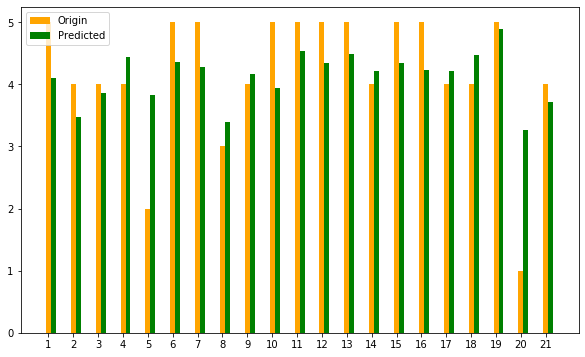

In [85]:
#실제평점과 비교 시각화하기
origin = origin_rating_list
predicted = predicted_rating_list

#영화의 갯수만큼 막대그래프의 index갯수 생성
plt.rcParams["figure.figsize"] = (10,6)
index = np.arange(len(movie_title_list))
bar_width = 0.2

#실제 점수와 예측점수를 bar graph로 그리기
rects1 = plt.bar(index,origin, bar_width, color= "orange",label="Origin")
rects2 = plt.bar(index+bar_width, predicted, bar_width, color = "green", label="Predicted")
plt.xticks(index,movie_title_list)
plt.legend()
plt.show()